# CUDA Performance Evaluation

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

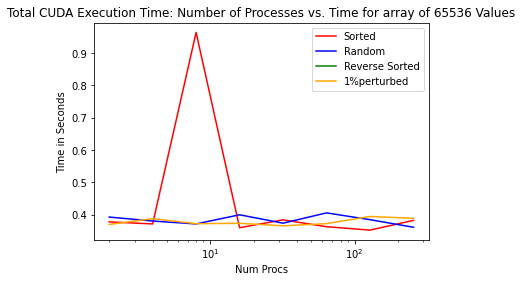

In [17]:
all_files = glob("*.cali")
input_types = ['Sorted', 'Random', 'Reverse Sorted', '1%perturbed']
colors = ['red', 'blue', 'green', 'orange']
     
for i in range(0, len(input_types)):
    procs_and_time = []
    for j in range(0, len(all_files)):
        tk = th.Thicket.from_caliperreader(all_files[j])
        if tk.metadata['InputSize'].values[0] == 65536 and tk.metadata['InputType'].values[0] == input_types[i]:
            procs_and_time.append((tk.metadata['num_threads'].values[0], tk.dataframe.iloc[0]['Total time']))
    procs_and_time = sorted(procs_and_time, key=lambda x: x[0])
    plt.plot([proc[0] for proc in procs_and_time], [time[1] for time in procs_and_time], color=colors[i], label=input_types[i])
        

plt.xlabel("Num Procs")
plt.ylabel("Time in Seconds")
plt.xscale('log')
plt.title("Total CUDA Execution Time: Number of Processes vs. Time for array of 65536 Values")
plt.legend()